# CNN 다중 분류 & 전이 학습
* CNN 학습곡선 및 평가
* 전이 학습 학습곡선 및 평가
> 이를 비교하여 작성

In [1]:
!pip install --q ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00
time: 516 µs (started: 2024-07-01 10:13:08 +00:00)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

time: 12.2 s (started: 2024-07-01 10:13:08 +00:00)


## 1. 데이터 준비

In [3]:
!gdown https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5

Downloading...
From (original): https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5
From (redirected): https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5&confirm=t&uuid=2cfd7aba-24c0-4b7c-9023-dd132b295aa4
To: /content/PlantVillage.zip
100% 345M/345M [00:03<00:00, 94.6MB/s]
time: 5.5 s (started: 2024-07-01 10:13:21 +00:00)


In [4]:
!unzip /content/PlantVillage.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff0f33d2-9e9f-4b74-861d-a7e0fdf8d248___Com.G_SpM_FL 8511.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff146f2c-dbb7-4da0-aa98-a36351435489___Com.G_SpM_FL 9654.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff20d775-59a6-437c-9039-f72d07aa4484___Com.G_SpM_FL 8524.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff6346ca-227b-4cb4-a350-0941048744fa___Com.G_SpM_FL 9338.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff9a52b5-b200-4f23-9e0d-629b1a0e89db___Com.G_SpM_FL 8634.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ffb00771-1462-4c9d-962b-7aaa7e8d5a51___Com.G_SpM_FL 1411.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ffb50767-1893-4379-ba42-8af6d8030057___Com.G_SpM_FL 8854.JPG  
  inflating: PlantVillage/Tomato_

In [5]:
# 루트 지정
data_root = '/content/PlantVillage'

late_blight_dir = data_root + '/Potato___Late_blight'
healthy_dir = data_root + '/Potato___healthy'
early_blight_dir = data_root + '/Potato___Early_blight'

print(late_blight_dir)
print(healthy_dir)
print(early_blight_dir)

/content/PlantVillage/Potato___Late_blight
/content/PlantVillage/Potato___healthy
/content/PlantVillage/Potato___Early_blight
time: 6.87 ms (started: 2024-07-01 10:13:46 +00:00)


In [6]:
class_name = ['late_blight_dir', 'healthy_dir', 'early_blight_dir']

time: 602 µs (started: 2024-07-01 10:13:46 +00:00)


In [7]:
import os
# 하나하나씩 로딩
late_fnames = os.listdir(late_blight_dir)
healthy_fnames = os.listdir(healthy_dir)
early_fnames = os.listdir(early_blight_dir)
print(late_fnames[:5])
print(healthy_fnames[:5])
print(early_fnames[:5])

['3b241fa8-12f2-4c80-afe2-0a4cdc8f34a1___RS_LB 5138.JPG', '5e92b00d-92ed-4de5-b3f7-0d14a076cf02___RS_LB 4004.JPG', 'd43fa915-e947-4316-b0f5-0f925c5d9625___RS_LB 3969.JPG', '929dd251-5fbb-406f-9313-a71e5f96b31c___RS_LB 4781.JPG', 'dbad8fb5-90a0-4bcc-902e-7b7b632d0233___RS_LB 4036.JPG']
['31a09d39-6791-4ecb-8f44-af2ed85dbd33___RS_HL 1970.JPG', 'b4031970-60ea-4739-9fed-6c81be1bad1c___RS_HL 1752.JPG', 'b925ad3e-fc49-497d-a6eb-115f0de20800___RS_HL 4170.JPG', '03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG', '57e24d88-fd01-4422-b8b5-d688d2296184___RS_HL 5401.JPG']
['15ab8118-01fb-4e9c-83a9-94ab224d6854___RS_Early.B 7962.JPG', 'fbbe7b93-e6da-4dc8-b1ee-ba5646a5e039___RS_Early.B 8216.JPG', '6173dbe2-1379-4241-a43e-7cbad448b6cc___RS_Early.B 6993.JPG', 'e50e7166-a67d-4207-a49c-0240b0218d48___RS_Early.B 8907.JPG', '29922d76-0eda-4e7c-89af-7688c656bfdd___RS_Early.B 8353.JPG']
time: 24.9 ms (started: 2024-07-01 10:13:46 +00:00)


In [8]:
import PIL

X_train = []
y_train = []

for fname in late_fnames:
  image = PIL.Image.open(late_blight_dir + '/' + fname)
  image = image.resize((244, 244)) # 튜플 형태
  arr = np.array(image) # numpy array 로 변경
  X_train.append(arr)
  y_train.append(0)

len(X_train), len(y_train)

(1000, 1000)

time: 6.42 s (started: 2024-07-01 10:13:46 +00:00)


In [9]:
for fname in healthy_fnames:
  image = PIL.Image.open(healthy_dir + '/' + fname)
  image = image.resize((244, 244)) # 튜플 형태
  arr = np.array(image) # numpy array 로 변경
  X_train.append(arr)
  y_train.append(1)

len(X_train), len(y_train)

(1152, 1152)

time: 982 ms (started: 2024-07-01 10:13:53 +00:00)


In [10]:
for fname in early_fnames:
  image = PIL.Image.open(early_blight_dir + '/' + fname)
  image = image.resize((244, 244)) # 튜플 형태
  arr = np.array(image) # numpy array 로 변경
  X_train.append(arr)
  y_train.append(2)

len(X_train), len(y_train)

(2152, 2152)

time: 8.7 s (started: 2024-07-01 10:13:54 +00:00)


In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2152, 244, 244, 3) (2152,)
time: 365 ms (started: 2024-07-01 10:14:02 +00:00)


## 2. 학습, 검증, test 데이터 분리

In [12]:
# 학습, test 데이터 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1721, 244, 244, 3) (431, 244, 244, 3)
(1721,) (431,)
time: 954 ms (started: 2024-07-01 10:14:03 +00:00)


In [13]:
# 학습, 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(1376, 244, 244, 3) (345, 244, 244, 3)
(1376,) (345,)
time: 302 ms (started: 2024-07-01 10:14:04 +00:00)


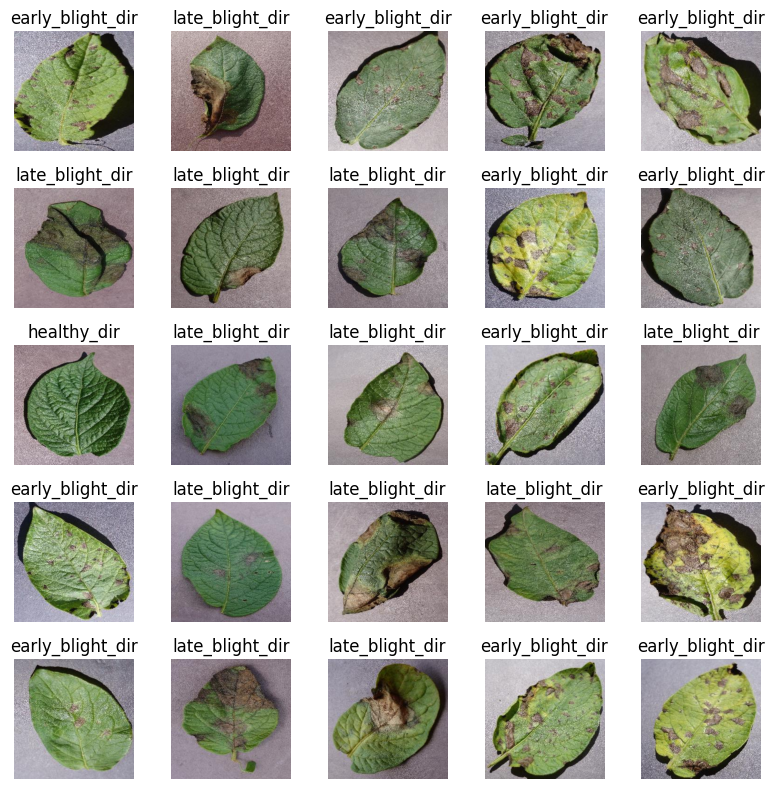

time: 5.33 s (started: 2024-07-01 10:14:04 +00:00)


In [14]:
sample = np.random.randint(1376, size = 25)

# sample 25개를 그리기
fig = plt.figure(figsize = (8, 8))
for i, idx in enumerate(sample):
    plt.subplot(5, 5, i+1) # 5*5, 1번부터
    plt.imshow(X_train[idx], cmap = 'gray') # color map
    plt.axis('off') # 축을 지움
    plt.title(class_name[y_train[idx]]) # 정답값 - 이름으로 출력
fig.tight_layout() # 보기 좋게 변경
plt.show()

In [15]:
# y_train balance 보기
sr = pd.Series(y_train).value_counts().sort_index()
sr

0    650
1     97
2    629
Name: count, dtype: int64

time: 39.1 ms (started: 2024-07-01 10:14:10 +00:00)


<BarContainer object of 3 artists>

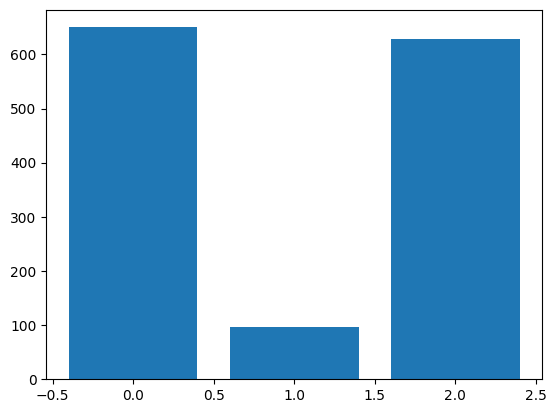

time: 425 ms (started: 2024-07-01 10:14:10 +00:00)


In [16]:
plt.bar(sr.index, sr)

## 3. 전처리

In [17]:
X_train_s = X_train.astype('float') / 255.0
X_val_s = X_val.astype('float') / 255.0

time: 1.71 s (started: 2024-07-01 10:14:10 +00:00)


In [18]:
print(X_train_s, X_val_s)
print(X_train_s.shape, X_val_s.shape)

[[[[0.48235294 0.46666667 0.53333333]
   [0.50588235 0.49019608 0.55686275]
   [0.52941176 0.51372549 0.58039216]
   ...
   [0.35686275 0.3254902  0.38431373]
   [0.35686275 0.3254902  0.38431373]
   [0.36078431 0.32941176 0.38823529]]

  [[0.49019608 0.4745098  0.54117647]
   [0.50588235 0.49019608 0.55686275]
   [0.5254902  0.50980392 0.57647059]
   ...
   [0.3372549  0.30588235 0.36470588]
   [0.36078431 0.32941176 0.38823529]
   [0.39607843 0.36470588 0.42352941]]

  [[0.49803922 0.48235294 0.54901961]
   [0.50980392 0.49411765 0.56078431]
   [0.52156863 0.50588235 0.57254902]
   ...
   [0.36862745 0.3372549  0.39607843]
   [0.36078431 0.32941176 0.38823529]
   [0.38039216 0.34901961 0.40784314]]

  ...

  [[0.5372549  0.49411765 0.5254902 ]
   [0.53333333 0.49019608 0.52156863]
   [0.52941176 0.48627451 0.51764706]
   ...
   [0.25882353 0.21568627 0.24705882]
   [0.39607843 0.35294118 0.38431373]
   [0.30588235 0.2627451  0.29411765]]

  [[0.54117647 0.49803922 0.52941176]
   [0.5

In [19]:
# one-hot encoding
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

time: 1.21 ms (started: 2024-07-01 10:14:12 +00:00)


In [20]:
y_train_o.shape, y_val_o.shape

((1376, 3), (345, 3))

time: 3.97 ms (started: 2024-07-01 10:14:12 +00:00)


In [21]:
print(X_train_s.shape, X_val_s.shape)
print(y_train_o.shape, y_val_o.shape)
print(type(X_train_s), type(X_val_s))
print(type(y_train_o), type(y_val_o))

(1376, 244, 244, 3) (345, 244, 244, 3)
(1376, 3) (345, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 3.11 ms (started: 2024-07-01 10:14:12 +00:00)


## 4. CNN 모델

In [22]:
X_train_s = X_train_s.reshape(-1, 244, 244, 3)
X_val_s = X_val_s.reshape(-1, 244, 244, 3)
print(X_train_s.shape, X_val_s.shape)
print(y_train_o.shape, y_val_o.shape)

(1376, 244, 244, 3) (345, 244, 244, 3)
(1376, 3) (345, 3)
time: 2.95 ms (started: 2024-07-01 10:14:12 +00:00)


In [23]:
from keras import layers

# add를 통해서 분기 가능
model = keras.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=3, activation = 'relu', input_shape = (244, 244, 3)))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

time: 462 ms (started: 2024-07-01 10:14:12 +00:00)


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 121, 121, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 59, 59, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 64)        1

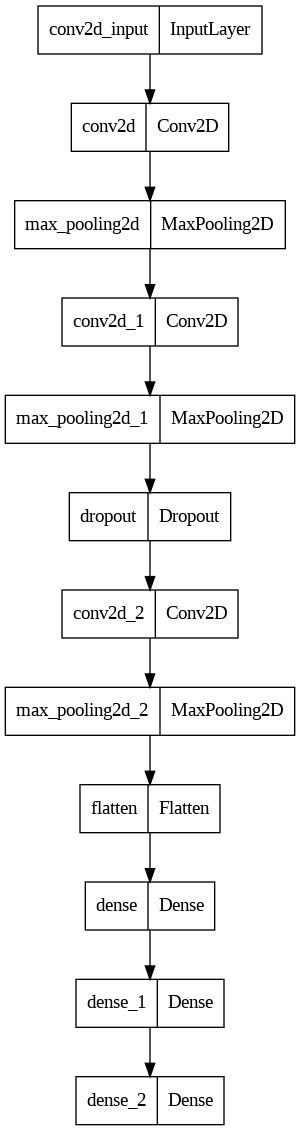

time: 321 ms (started: 2024-07-01 10:14:12 +00:00)


In [25]:
keras.utils.plot_model(model)

In [26]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

time: 35.5 ms (started: 2024-07-01 10:14:13 +00:00)


In [27]:
from keras import callbacks

es = callbacks.EarlyStopping(monitor='val_loss', patience=5)
# 갱신된 값을 파일로 저장할 수 있음 - 각 epochs마다 or 기타 등 옵션을 줄 수 있음
ckpt_path = './temp/potato.ckpt'
ckpt = keras.callbacks.ModelCheckpoint(
    ckpt_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True # 가중치만 저장할지 - False: layer + 가중치 정보
    )

time: 1.26 ms (started: 2024-07-01 10:14:13 +00:00)


In [28]:
print(X_train_s.shape, y_train_o.shape)

(1376, 244, 244, 3) (1376, 3)
time: 2.66 ms (started: 2024-07-01 10:14:13 +00:00)


In [29]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train_o,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks = [es, ckpt],
                    validation_data = (X_val_s, y_val_o))

Epoch 1/10
43/43 [==============================] - 100s 2s/step - loss: 0.9758 - accuracy: 0.5828 - val_loss: 0.7082 - val_accuracy: 0.7188
Epoch 2/10
43/43 [==============================] - 102s 2s/step - loss: 0.4825 - accuracy: 0.8227 - val_loss: 0.3963 - val_accuracy: 0.8696
Epoch 3/10
43/43 [==============================] - 99s 2s/step - loss: 0.2553 - accuracy: 0.9062 - val_loss: 0.2760 - val_accuracy: 0.8957
Epoch 4/10
43/43 [==============================] - 97s 2s/step - loss: 0.1935 - accuracy: 0.9273 - val_loss: 0.2056 - val_accuracy: 0.9246
Epoch 5/10
43/43 [==============================] - 110s 3s/step - loss: 0.2054 - accuracy: 0.9244 - val_loss: 0.2187 - val_accuracy: 0.8899
Epoch 6/10
43/43 [==============================] - 102s 2s/step - loss: 0.1699 - accuracy: 0.9368 - val_loss: 0.1480 - val_accuracy: 0.9420
Epoch 7/10
43/43 [==============================] - 97s 2s/step - loss: 0.1195 - accuracy: 0.9542 - val_loss: 0.0978 - val_accuracy: 0.9565
Epoch 8/10
43/43

In [30]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 2.22 ms (started: 2024-07-01 10:31:41 +00:00)


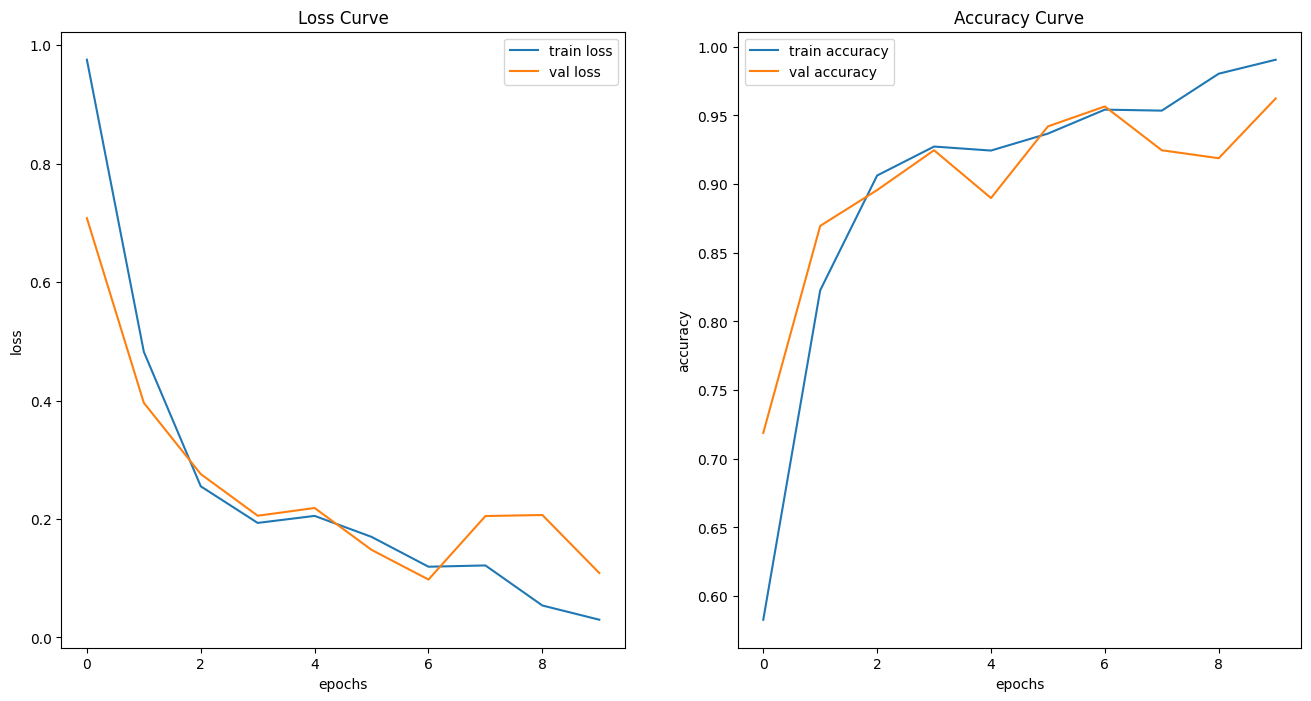

time: 554 ms (started: 2024-07-01 10:31:41 +00:00)


In [31]:
plot_history(history)

In [32]:
# 이 모델이 베스트인 상태임
model_cnn = model.load_weights(ckpt_path)

time: 133 ms (started: 2024-07-01 10:31:42 +00:00)


## 5. CNN 모델 검증

In [33]:
# test data one-hot encoding
y_test_o = to_categorical(y_test)

y_test_o

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

time: 5.37 ms (started: 2024-07-01 10:31:42 +00:00)


In [34]:
X_test_s = X_test.astype('float') / 255.0
X_test_s = X_test_s.reshape(-1, 244, 244, 3)
print(X_test_s, X_test_s.shape)

[[[[0.59607843 0.54901961 0.55686275]
   [0.70588235 0.65882353 0.66666667]
   [0.65490196 0.60784314 0.61568627]
   ...
   [0.84705882 0.82352941 0.82352941]
   [0.8627451  0.83921569 0.83921569]
   [0.85098039 0.82745098 0.82745098]]

  [[0.61176471 0.56470588 0.57254902]
   [0.6        0.55294118 0.56078431]
   [0.84313725 0.79607843 0.80392157]
   ...
   [0.85882353 0.83529412 0.83529412]
   [0.85882353 0.83529412 0.83529412]
   [0.83137255 0.80784314 0.80784314]]

  [[0.77254902 0.7254902  0.73333333]
   [0.63529412 0.58823529 0.59607843]
   [0.6        0.55294118 0.56078431]
   ...
   [0.8627451  0.83921569 0.83921569]
   [0.83921569 0.81568627 0.81568627]
   [0.79607843 0.77254902 0.77254902]]

  ...

  [[0.74117647 0.69803922 0.72941176]
   [0.52156863 0.47843137 0.50980392]
   [0.63529412 0.59215686 0.62352941]
   ...
   [0.78431373 0.76470588 0.78039216]
   [0.78823529 0.76862745 0.78431373]
   [0.78039216 0.76078431 0.77647059]]

  [[0.75686275 0.71372549 0.74509804]
   [0.5

In [35]:
print(type(X_test), type(y_test_o))
print(X_test.shape, y_test_o.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(431, 244, 244, 3) (431, 3)
time: 1.02 ms (started: 2024-07-01 10:31:42 +00:00)


In [36]:
y_pred = model.predict(X_test_s)
#y_pred = np.argmax(y_pred, axis = 1)
y_pred

14/14 [==============================] - 12s 775ms/step


array([[9.9147891e-04, 1.3056417e-05, 9.9899554e-01],
       [1.3046665e-03, 5.4708466e-06, 9.9868977e-01],
       [9.9105603e-01, 3.7069188e-04, 8.5732723e-03],
       ...,
       [9.8298645e-01, 3.0851054e-03, 1.3928323e-02],
       [9.3139559e-01, 4.4006309e-03, 6.4203791e-02],
       [9.9668592e-01, 5.2358047e-04, 2.7904389e-03]], dtype=float32)

time: 23.1 s (started: 2024-07-01 10:31:42 +00:00)


In [37]:
y_pred = np.argmax(y_pred, axis = 1)
y_test_o = np.argmax(y_test_o, axis = 1)

time: 2.39 ms (started: 2024-07-01 10:32:06 +00:00)


In [38]:
y_test_o.shape, y_pred.shape

((431,), (431,))

time: 4.47 ms (started: 2024-07-01 10:32:06 +00:00)


accuracy: 0.9651972157772621
recall_score: 0.9192079849974587
precision_score: 0.9283455986528389
f1_score: 0.9236691352825875


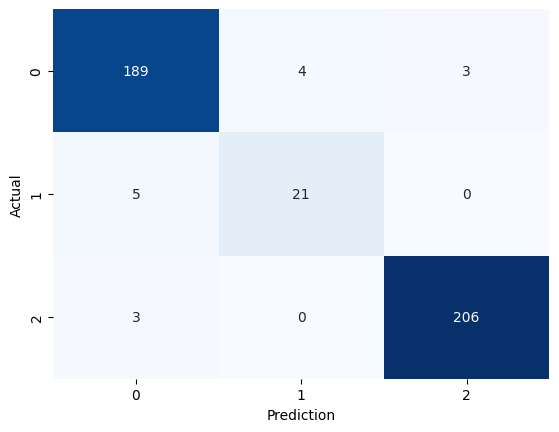

time: 244 ms (started: 2024-07-01 10:32:06 +00:00)


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
def print_metrics(y_true, y_pred, aver='macro'):
    print("accuracy:", accuracy_score(y_true, y_pred))
    print("recall_score:", recall_score(y_true, y_pred, average = aver))
    print("precision_score:", precision_score(y_true, y_pred, average = aver))
    print("f1_score:", f1_score(y_true, y_pred, average = aver))
    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt = 'd', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()
print_metrics(y_test, y_pred, aver='macro')

## 6. 전이 학습

In [40]:
from keras.applications import VGG16

base_model = VGG16(weights = 'imagenet',
                   include_top = False,
                   input_shape = (244, 244, 3))

base_model.trainable = False
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                              

In [41]:
from keras import layers

model_trans = keras.Sequential()
model_trans.add(base_model)
model_trans.add(layers.Flatten())
model_trans.add(layers.Dense(1024, activation = 'relu'))
model_trans.add(layers.Dropout(0.3))
model_trans.add(layers.Dense(512, activation = 'relu'))
model_trans.add(layers.Dropout(0.3))
model_trans.add(layers.Dense(256, activation = 'relu'))
model_trans.add(layers.Dropout(0.3))
model_trans.add(layers.Dense(3, activation = 'softmax'))

model_trans.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              25691136  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)              

In [42]:
model_trans.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

time: 34.4 ms (started: 2024-07-01 10:32:08 +00:00)


In [ ]:
EPOCHS = 10
BATCH_SIZE = 32

history_trans = model_trans.fit(X_train_s, y_train_o,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks = [es, ckpt],
                    validation_data = (X_val_s, y_val_o))

Epoch 1/10
43/43 [==============================] - 1420s 33s/step - loss: 1.5924 - accuracy: 0.6352 - val_loss: 0.3336 - val_accuracy: 0.8580
Epoch 2/10
43/43 [==============================] - 1304s 31s/step - loss: 0.3791 - accuracy: 0.8619 - val_loss: 0.2146 - val_accuracy: 0.9130
Epoch 3/10
43/43 [==============================] - 1292s 30s/step - loss: 0.2506 - accuracy: 0.9048 - val_loss: 0.2005 - val_accuracy: 0.9217
Epoch 4/10
43/43 [==============================] - 1309s 31s/step - loss: 0.1725 - accuracy: 0.9368 - val_loss: 0.1616 - val_accuracy: 0.9391
Epoch 5/10
 2/43 [>.............................] - ETA: 16:22 - loss: 0.1002 - accuracy: 0.9844

In [ ]:
plot_history(history_trans)

In [ ]:
model_trans_ckpt = model.load_weights(ckpt_path)

## 7. 전이 학습 검증

In [ ]:
y_pred_trans = model_trans.predict(X_test_s)
y_pred_trans = np.argmax(y_pred_trans, axis = 1)
y_pred_trans

In [ ]:
print_metrics(y_test, y_pred_trans, aver='macro')